# Sea ice data

In [1]:
import xarray as xr
import s3fs
import matplotlib.pyplot as plt
import pandas as pd

import cartopy.crs as ccrs

s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))


In [2]:
# path to the file: bucket/forlder/filename.nc
s3file = 's3://escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20150331-v5.4.nc'
file = s3.open(s3file)
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:              (x: 1216, y: 1792)
Coordinates:
  * x                    (x) float64 -3.847e+06 -3.841e+06 ... 3.747e+06
  * y                    (y) float64 -5.347e+06 -5.341e+06 ... 5.847e+06
Data variables:
    polar_stereographic  |S1 ...
    z                    (y, x) float32 ...
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Jan 21 19:19:04 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

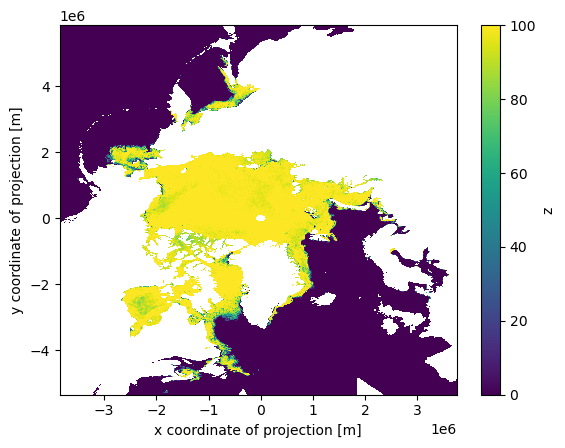

In [3]:
ds.z.plot()

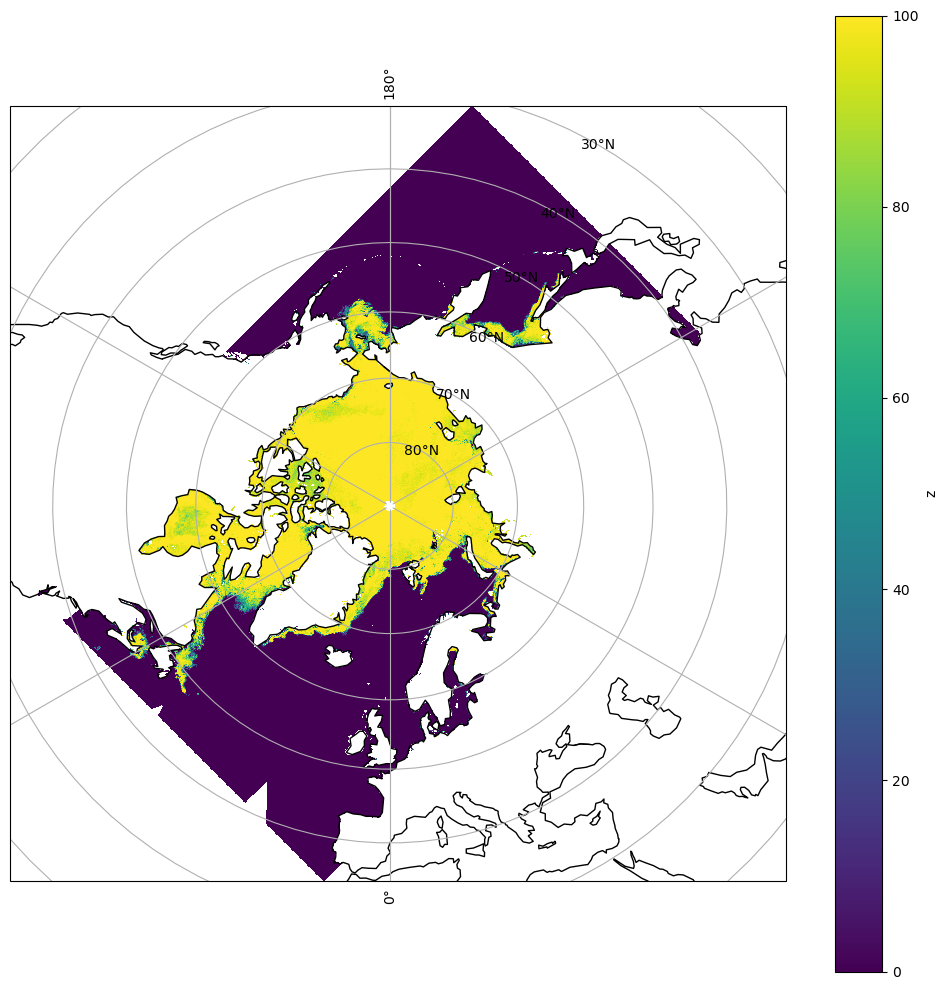

In [18]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
# fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

ds.z.plot.pcolormesh(
    ax = ax,
    # cbar_kwargs={ 'orientation':'vertical', 'shrink':.8},
    # transform=ccrs.PlateCarree(),
    transform=ccrs.epsg(3411),
    # levels=10,
        )
ax.gridlines(draw_labels=True)
ax.coastlines()
fig.tight_layout()
